# Housing Prices Prediction <a class="anchor" id="BackToTop"></a>

In this notebook I'm going to continue to incorporate data science & machine learning tools that I have been practicing throughout my lessons and other projects in addition to some new tools/techniques/methods that I've come across in my research since then.

Also - I have been getting more familiar with Jupyter notebook functionality so I will be designing this workbook in such a way that makes it extremely easy to navigate :)

This will be - by far - my most detailed and robust data science project.

**NOTE:** The emphasis in this project is on the machine learning & modelling side. You'll find much less data visualization and data analysis. In addition - you will find that the modelling section has the most amount of narration and explanation. Following sections are more code based.

##### Table of Contents: 

* [1. Introduction](#Introduction)
    * [1.1 Problem Definition](#ProblemDefinition)
    * [1.2 Framework](#Framework)
* [2. Data](#Data)
    * [2.1 Data Dictionary](#DataDictionary)
    * [2.2 EDA](#EDA)
        * [2.2.1 Pandas Profiling](#PandasProfiling)
        * [2.2.2 EDA by Hand](#EDAbyHand)
    * [2.3 Preprocessing](#Preprocessing)
        * [2.3.1 Imputation](#Imputation)
            * [Categorical Values](#CategoricalValues)
            * [Numerical Values](#NumericalValues)
        * [2.3.2 Encoding](#Encoding)
            * [Ordinal Encoding](#OrdinalEncoding)
            * [One Hot Encoding and Ordinal Encoding](#OneHotEncodingAndOrdinalEncoding)
* [3. Modelling](#Modelling)
    * [3.1 Train, Validation & Test Split](#TrainValidationTestSplit)
    * [3.2 Stochastic Gradient Descent Regressor](#StochasticGradientDescentRegressor)
    * [3.3 Regularization](#Regularization)
        * [3.3.1 Ridge Regressor](#RidgeRegressor)
        * [3.3.2 Lasso Regressor](#LassoRegressor)
        * [3.3.3 Elastic-Net Regressor](#ElasticNetRegressor)
    * [3.4 Support Vector Regressor](#SupportVectorRegressor)
        * [3.4.1 Linear Kernel Function](#LinearKernelFunction)
        * [3.4.2 RBF Kernel Function](#RBFKernelFunction)
    * [3.5 Ensemble Methods](#EnsembleMethods)
        * [3.5.1 Random Forest Regressor](#RandomForestRegressor)
        * [3.5.1 Gradient Boosting Regressor](#GradientBoostingRegressor)
* [4. Evaluation](#Evaluation)
* [5. Tuning](#Tuning)
* [6. Further Experimentation](#FurtherExperimentation)
* [7. Final Model Submission](#FinalModelSubmission)


## 1. Introduction <a class="anchor" id="Introduction"></a>

This workbook is an example of how I would approach a machine learning **POC** or proof of concept. This is representative of an end-to-end proof of concept. The data used is based on a more modernized and expanded version of the widely used Boston Housing dataset. To read more, check out the competition link on Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

## 1.1 Problem Definition <a class="anchor" id="ProblemDefinition"></a>

Using a dataset with 79 attributes or explanatory variables - build a model that can predict housing prices for homes in Ames, Iowa. 

**Bonus:** In addition, besides predicting the price, be able to explain what factors/features have the largest impact on price. In a business scenario - this information may prove to be extremely valuable during a negotiation. In data science lingo this is called `feature importance`.

## 1.2 Framework <a class="anchor" id="Framework"></a>

Once again, I am going to use the framework that I was taught during my ZTM Udemy Course. You'll find that I won't follow the framework to the T - but it will still guide my thinking and structure behind the project:

<div>
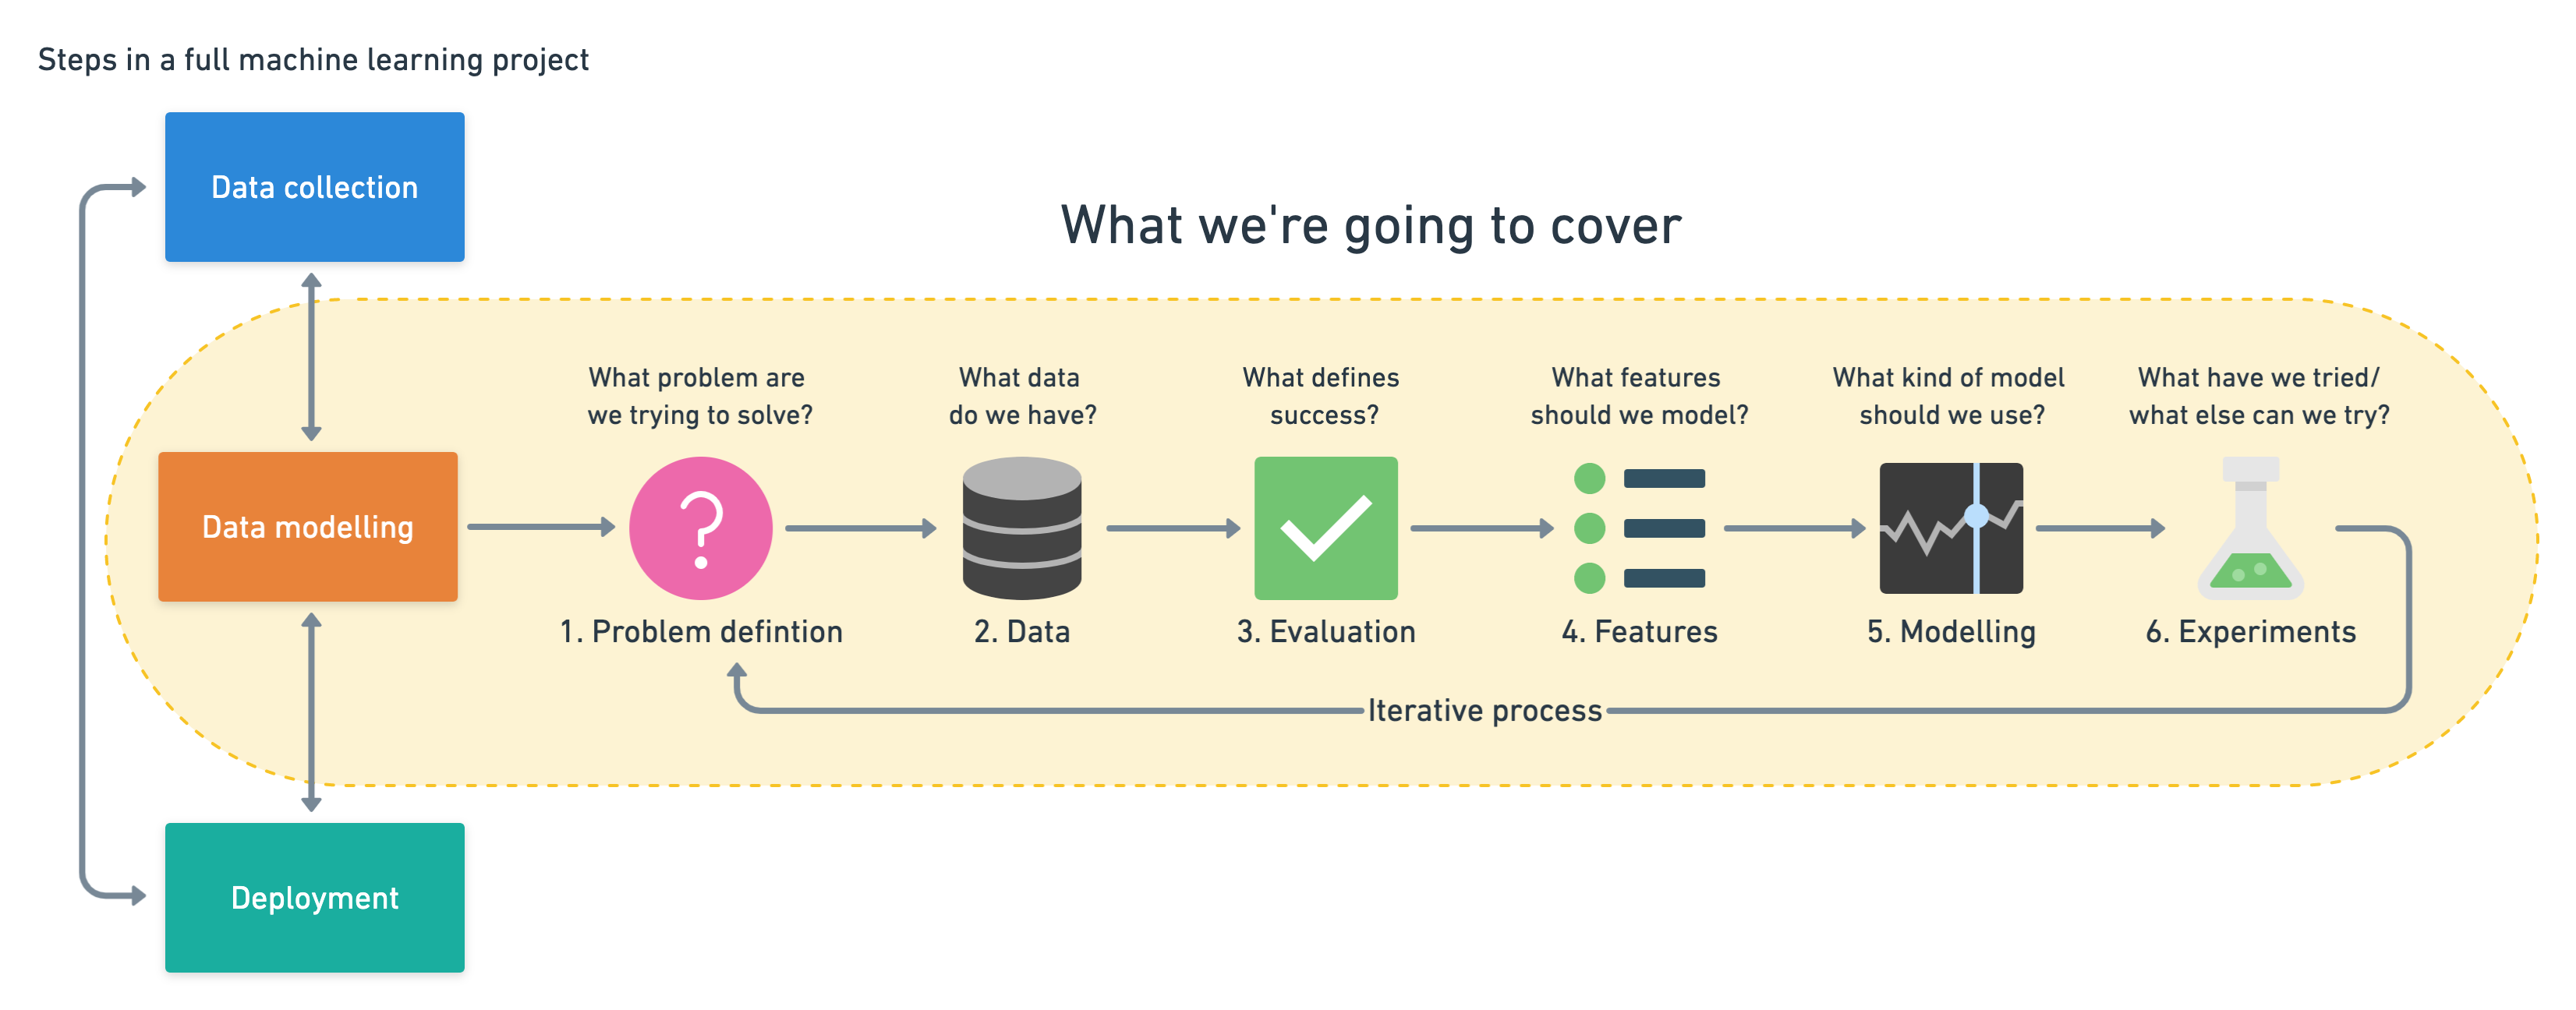
</div>

[Back to Top](#BackToTop)

<img src="Images/ml101-6-step-ml-framework.png" width="70%"/>

## 2. Data <a class="anchor" id="Data"></a>

### 2.1 Data Dictionary <a class="anchor" id="DataDictionary"></a>
To understand the different values and what they mean for each column/field/feature, here's a print out of the text file that Kaggle provides:

In [1]:
# Print the file content of the data description text file
text_file = open('Datasets/house-prices-advanced-regression-techniques/data_description.txt')
file_content = text_file.read()
print(file_content)
text_file.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

[Back to Top](#BackToTop)

### 2.2 EDA <a class="anchor" id="EDA"></a>

* In my past projects, I didn't spend much time doing EDA because it wasn't really an area that I felt like I needed to improve. During my research I came across an **amazing** pandas library that does an impressive amount of EDA for us with just a few lines of code. I'll be implementing that in this workbook.

* Instead of embedding the report directly in the Jupyter notebook - I'm actually going to export the report to a file. Embedding the report in the jupyter notebook file was slowing down my computer by taking up a large amount of RAM. Since this is in the beginning of my workflow - I'd rather not slow down my notebook.
    * **I will have the external file posted on my github in the same directory as this Jupyter notebook for public viewing. Or, you can just click this link:** https://github.com/marlonholland/data-science/blob/master/projects/profile-reports/profile-report-housing.html
    
    * **In addition, I will still be doing some EDA by hand simply because there was some neccessary EDA I couldn't avoid. I won't be including any visualizations though. I'd rather do that with a BI tool.**

#### 2.2.1 Pandas Profiling <a class="anchor" id="PandasProfiling"></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load Data Treating NA fields as text
df = pd.read_csv('Datasets/house-prices-advanced-regression-techniques/train.csv', keep_default_na=False) 

In [ ]:
# Implement Pandas Profiling 
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

# Export the report to a file because it takes up a lot of memory
profile.to_file('Datasets/house-prices-advanced-regression-techniques/profile_report.html')

In the pandas profile report, for each column, the following information (whenever relevant for the column type) is presented in an interactive HTML report:


* **Type inference**: detect the types of columns in a `DataFrame`
* **Essentials**: type, unique values, indication of missing values
* **Quantile statistics**: minimum value, Q1, median, Q3, maximum, range, interquartile range
* **Descriptive statistics**: mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
* **Most frequent and extreme values**
* **Histograms**: categorical and numerical
* **Correlations**: high correlation warnings, based on different correlation metrics (Spearman, Pearson, Kendall, Cramér’s V, Phik)
* **Missing values**: through counts, matrix, heatmap and dendrograms
* **Duplicate rows**: list of the most common duplicated rows
* **Text analysis**: most common categories (uppercase, lowercase, separator), scripts (Latin, Cyrillic) and blocks (ASCII, Cyrilic)
* **File and Image analysis**: file sizes, creation dates, dimensions, indication of truncated images and existance of EXIF metadata


The report contains three additional sections:


* **Overview**: mostly global details about the dataset (number of records, number of variables, overall missigness and duplicates, memory footprint)
* **Alerts**: a comprehensive and automatic list of potential data quality issues (high correlation, skewness, uniformity, zeros, missing values, constant values, between others)
* **Reproduction**: technical details about the analysis (time, version and configuration)

For more on this awesome library, check out their documentation: https://pandas-profiling.ydata.ai/docs/master/pages/getting_started/overview.html

[Back to Top](#BackToTop)

#### 2.2.2 EDA by Hand <a class="anchor" id="EDAbyHand"></a>

In [4]:
 # Display missing column percentages and their datatypes
missing_df = pd.concat([df.dtypes,df.isin(['NA']).sum()/len(df)], axis=1).rename(columns={0:'dtype', 1: 'missing'})
missing_df[missing_df.missing != 0]

,dtype,missing
LotFrontage,object,0.177397
Alley,object,0.937671
MasVnrType,object,0.005479
MasVnrArea,object,0.005479
BsmtQual,object,0.025342
BsmtCond,object,0.025342
BsmtExposure,object,0.026027
BsmtFinType1,object,0.025342
BsmtFinType2,object,0.026027
Electrical,object,0.000685



The table I've created above in combination with the results from the profile report (example below) indicate that the creators of the dataset correctly labeled  **all** missing data as `NA`. Initially the pandas profile report treated `NA` as null, but because I loaded the data with `keep_default_na=False`, I was able to check for true nulls. We can now confirm no true nulls exist in the data. However, now I need to reload the data and treat the `NA` fields as nulls so that I can correct the label/feature/column datatypes and correctly preprocess the data..



<div>
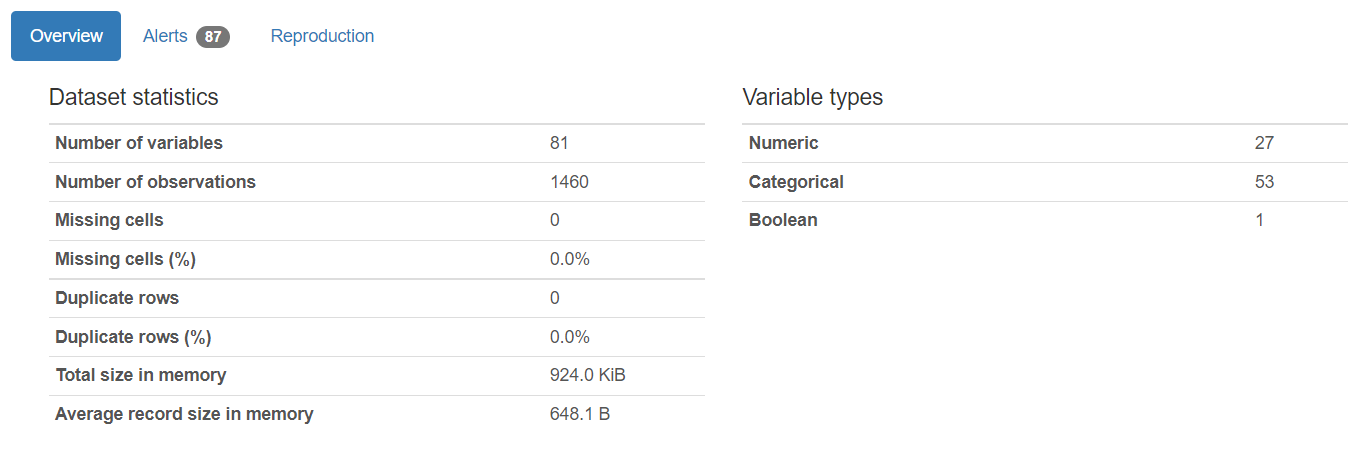
</div>



In [5]:
# Reload data accounting for NA values
df = pd.read_csv('Datasets/house-prices-advanced-regression-techniques/train.csv', na_values='NA') 

In [6]:
# Recreate missing dataframe 
missing_df = pd.concat([df.dtypes,df.isnull().sum()/len(df)], axis=1).rename(columns={0:'dtype', 1: 'missing'})
missing_df[missing_df.missing != 0]

,dtype,missing
LotFrontage,float64,0.177397
Alley,object,0.937671
MasVnrType,object,0.005479
MasVnrArea,float64,0.005479
BsmtQual,object,0.025342
BsmtCond,object,0.025342
BsmtExposure,object,0.026027
BsmtFinType1,object,0.025342
BsmtFinType2,object,0.026027
Electrical,object,0.000685


If you compare this dataframe to the initial dataframe - you can see that pandas is now correctly identifying our numerical fields. Wonderful! Now that we have corrected datatypes, we can begin preprocessing!

[Back to Top](#BackToTop)

### 2.3 Preprocessing <a class="anchor" id="Preprocessing"></a>

Now that we've had a look at the data, let's do some preprocessing on the data before we begin to model it.

Some important aspects I want to cover are:

* **Imputation** - Handling missing values. The data by default uses "NA" for missing fields, but this won't work for our numerical fields. I'll do some research on the best way to handle this and maybe explore some different options.


* **Encoding** - Convert text/categorical values into numerical values. There's two different methods I want to try out - using pandas' `categorical` datatype and using sklearn's `OneHotEncoder`.


* **Feature Scaling** - I'll need to do more research on this topic - but I'm going to try two popular forms of feature scaling for a regression problem - `Standardization` and `Normalization`.
    * **NOTE:** I've decided to include feature scaling in the modelling section where I'm using sci-kit learn's `Pipeline`.

#### 2.3.1 Imputation <a class="anchor" id="Imputation"></a>

Instead of past projects where I'd just loop through different ways of doing things (in this case I'd loop through different ways of imputation) I'm going to actually take a calculated approach and decide on the best method based on my research. First up - categorical/text values.

##### Categorical Values <a class="anchor" id="CategoricalValues"></a>

In [7]:
# View all missing categorical values once again
missing_df[(missing_df.missing != 0) & (missing_df.dtype == 'object')]

,dtype,missing
Alley,object,0.937671
MasVnrType,object,0.005479
BsmtQual,object,0.025342
BsmtCond,object,0.025342
BsmtExposure,object,0.026027
BsmtFinType1,object,0.025342
BsmtFinType2,object,0.026027
Electrical,object,0.000685
FireplaceQu,object,0.472603
GarageType,object,0.055479


In [8]:
# Create a custom function to get unique values for missing fields
def create_uniques_df(df):
    """
    Return a dictionary of columns with missing data and their unique values.
    
    Parameters:
    df (DataFrame): The data you want to check contained in a DataFrame.
    """
    uniques = {}
    missing = pd.concat([df.dtypes,df.isnull().sum()/len(df)], axis=1).rename(columns={0:'dtype', 1: 'missing'})
    for index, row in missing[(missing_df.missing != 0) & (missing_df.dtype == 'object')].iterrows():
        for column in df:
            if index == column:
                uniques[column] = df[index].unique().tolist()
    return uniques

In [9]:
# Run custom function above
import pprint as pp
uniques = create_uniques_df(df)
pp.pprint(uniques)

{'Alley': [nan, 'Grvl', 'Pave'],
 'BsmtCond': ['TA', 'Gd', nan, 'Fa', 'Po'],
 'BsmtExposure': ['No', 'Gd', 'Mn', 'Av', nan],
 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'],
 'BsmtFinType2': ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'],
 'BsmtQual': ['Gd', 'TA', 'Ex', nan, 'Fa'],
 'Electrical': ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan],
 'Fence': [nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'],
 'FireplaceQu': [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'],
 'GarageCond': ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'],
 'GarageFinish': ['RFn', 'Unf', 'Fin', nan],
 'GarageQual': ['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'],
 'GarageType': ['Attchd',
                'Detchd',
                'BuiltIn',
                'CarPort',
                nan,
                'Basment',
                '2Types'],
 'MasVnrType': ['BrkFace', 'None', 'Stone', 'BrkCmn', nan],
 'MiscFeature': [nan, 'Shed', 'Gar2', 'Othr', 'TenC'],
 'PoolQC': [nan, 'Ex', 'Fa', 'Gd']}


Based on surveying the unique values contained in each categorical feature *and* the data dictionary, it actually just makes sense to convert all missing data in the dataset back to `NA`. So, we really went full circle here. But now we are absolutely confident in our data model.

In [10]:
# Change nulls to NA for categorical/text values
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label].fillna('NA', inplace= True)

In [11]:
# Confirm the above
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Perfect. No more null text fields. Nice and easy. Onto handling the numerical values!

[Back to Top](#BackToTop)

##### Numerical Values <a class="anchor" id="NumericalValues"></a>

In [12]:
# View all missing numerical values once again
missing_df[(missing_df.missing != 0) & (missing_df.dtype != 'object')]

,dtype,missing
LotFrontage,float64,0.177397
MasVnrArea,float64,0.005479
GarageYrBlt,float64,0.055479


* **MasVnrArea** is interesting because it has values of 0 and values of 'NA' in the original dataset and the data dictionary says nothing about this. I'm going to assume that the value of 0 is for homes without a masonry veneer area. Therefore - I'm going to fill blanks with additional 0's.


* **LotFrontage** is similar to the above. I'll impute missing values with zero here too. Easy.


* **GarageYrBlt** is the odd one of the three. For homes without a garage - the year built column was by default 'NA' but I need to think of a numerical value to pass here. It's not like the dataset is really *missing* the data. There's just no year because the garage was never built. For every home/record that has a **GarageType** value of `NA`, the **GarageYrBlt** column is missing. Therefore - I think it makes since to use zero imputation here once again because the model should see that correlation. If the **GarageType** column didn't exist, then I would probably have used a mean imputation and added a **GarageYrMissing** binary flag column.

In [13]:
# Change nulls to 0 for numerics
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        df[label].fillna(0, inplace= True)

In [14]:
# Confirm the above
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

And that's it for imputation - nice and easy for this dataset. You'll notice that I didn't have to split the train data set into train and validation sets before imputing. This is because the method I used for imputation was straightforward and would not cause any leakage - since we're not doing any calculations.

If I needed to be more careful about leakage in this project - I would have included all of the preprocessing in a `Pipeline` from scikit-learn.

[Back to Top](#BackToTop)

#### 2.3.2 Encoding <a class="anchor" id="Encoding"></a>

Before I start implementing different forms of encoding, it's important to understand which features/columns represent **ordinal data** and which columns represent **nominal data**. 

**Ordinal data** is when the categories have an inherent order - meaning their order matters and the order provides information about the data.

For example - our feature **LandSlope** can be considered **ordinal** because the order indicates greater degrees of slope.

* **LandSlope** - Slope of property
    * **Gtl** - Gentle slope
    * **Mod** - Moderate slope
    * **Sev** - Severe slope
    
**Nominal data** is the complete opposite. 
    
A **nominal** example we have in our data set is the **GarageType** column because the order doesn't give any sort of information about the home:

* **GarageType** -  Garage location
    * **2Types** -	More than one type of garage
    * **Attchd** -	Attached to home
    * **Basment** -	Basement Garage
    * **BuiltIn** -	Built-In (Garage part of house - typically has room above garage)
    * **CarPort** -	Car Port
    * **Detchd** -	Detached from home
    * **NA** -	No Garage
    
* Based on the above - I'm going to branch out our original data set into two different datasets:

    * All ordinal encoding using pandas' `Category` datatype
    * Mixture of one-hot encoding on nominal fields and ordinal encoding on ordinal fields. I'll use `OneHotEncoder`.

##### Ordinal Encoding <a class="anchor" id="OrdinalEncoding"></a>
For columns that have an inherent order - I will try to utilize that order. For nominal columns - I'm letting sci-kit learn decide on the order.

In [15]:
# Capture ordinal columns and their values (IN ORDER!!)
ordinal_values = {'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
                  'Utilies': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'],
                  'LandSlope': ['Gtl', 'Mod', 'Sev'],
                  'ExterQual': ['Ex', 'Gd', 'TA', 'Fa'],
                  'ExterCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
                  'BsmtQual': ['Ex', 'Gd', 'TA', 'Fa','NA'],
                 'BsmtCond': ['Gd', 'TA', 'Fa', 'Po', 'NA'],
                  'BsmtExposure': ['Gd', 'Av', 'Mn', 'No', 'NA'],
                  'BsmtFinType1': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
                  'BsmtFinType2': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
                  'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
                  'KitchenQual': ['Ex', 'Gd', 'TA', 'Fa'],
                  'Functional': ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev'],
                  'FireplaceQu': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
                  'GarageFinish': ['Fin', 'RFn', 'Unf', 'NA'],
                  'GarageQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
                  'GarageCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
                  'PavedDrive': ['Y', 'P', 'N'],
                  'PoolQC': ['Ex', 'Gd', 'Fa', 'NA'],
                  'Fence': ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA']}

As we can see - a large amount of our text/categorical features/columns are ordinal data. There were some columns I wasn't too sure about with the detail the data dictionary provided. That would be a case where I could connect with a SME (subject matter expert). Now that I've got the columns and their values ordered, let's actually encode them.

https://pandas.pydata.org/docs/user_guide/categorical.html#categorical-sort

In [16]:
# Create a list for our nominal values (similar to our ordinal dictionaries above)
nominal_values = []
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content) and label not in ordinal_values:
        nominal_values.append(label)
nominal_values

['MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [17]:
# Create dataset using only ordinal encoding
ordinal_df = df.copy()
for label,content in ordinal_df.items():
    if pd.api.types.is_string_dtype(content):
        ordinal_df[label] = content.astype('category').cat.as_ordered()

In [18]:
# Add order importance for ordinal values
for label,content in ordinal_df.items():
    if label in ordinal_values:
        true_order = ordinal_values[label][::-1] 
        ordinal_df[label].cat.reorder_categories(true_order,ordered=True,inplace=True)

C:\Users\Marlon.Holland\AppData\Local\Temp\ipykernel_7848\1218602120.py:5: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  ordinal_df[label].cat.reorder_categories(true_order,ordered=True,inplace=True)
C:\Users\Marlon.Holland\AppData\Local\Temp\ipykernel_7848\1218602120.py:5: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  ordinal_df[label].cat.reorder_categories(true_order,ordered=True,inplace=True)
C:\Users\Marlon.Holland\AppData\Local\Temp\ipykernel_7848\1218602120.py:5: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  ordin

In [19]:
# Change categories to integers
for label,content in ordinal_df.items():
    if pd.api.types.is_categorical_dtype(content):
        ordinal_df[label] = pd.Categorical(content).codes + 1

In [20]:
# Sample original values
df.HeatingQC.head()

0    Ex
1    Ex
2    Ex
3    Gd
4    Ex
Name: HeatingQC, dtype: object

In [21]:
# Sample new values to confirm
ordinal_df.HeatingQC.head()

0    5
1    5
2    5
3    4
4    5
Name: HeatingQC, dtype: int8

You can see that the ordinal encoding is working properly based on the samples above. Let's move on to the next dataset.

[Back to Top](#BackToTop)

##### One Hot Encoding  and Ordinal Encoding<a class="anchor" id="OneHotEncodingAndOrdinalEncoding"></a>

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

First, let's encode our ordinal values using label encoding again.

In [23]:
# Create new copy of df
one_hot_df = df.copy()

# Change ordinal columns/features to categories
for label,content in one_hot_df.items():
    if pd.api.types.is_string_dtype(content) and label in ordinal_values:
        one_hot_df[label] = content.astype('category').cat.as_ordered()

# Give our categories the correct order importance
for label,content in one_hot_df.items():
    if label in ordinal_values:
        true_order = ordinal_values[label][::-1] 
        one_hot_df[label].cat.reorder_categories(true_order,ordered=True,inplace=True)

# Change our categories to integers
for label,content in one_hot_df.items():
    if pd.api.types.is_categorical_dtype(content):
        one_hot_df[label] = pd.Categorical(content).codes + 1

C:\Users\Marlon.Holland\AppData\Local\Temp\ipykernel_7848\1602618854.py:13: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  one_hot_df[label].cat.reorder_categories(true_order,ordered=True,inplace=True)
C:\Users\Marlon.Holland\AppData\Local\Temp\ipykernel_7848\1602618854.py:13: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  one_hot_df[label].cat.reorder_categories(true_order,ordered=True,inplace=True)
C:\Users\Marlon.Holland\AppData\Local\Temp\ipykernel_7848\1602618854.py:13: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  on

Now, let's encode our nominal values using one hot encoding with scitkit-learn's `OneHotEncoder`.

In [24]:
# Encode our nominal columns/features
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,nominal_values)],remainder='passthrough')
arr = transformer.fit_transform(one_hot_df)
one_hot_df = pd.DataFrame(arr,columns = transformer.get_feature_names_out())

In [25]:
# Confirm the transformation
pd.set_option('display.max_rows', 230)
one_hot_df.head().T

,0,1,2,3,4
one_hot__MSZoning_C (all),0.0,0.0,0.0,0.0,0.0
one_hot__MSZoning_FV,0.0,0.0,0.0,0.0,0.0
one_hot__MSZoning_RH,0.0,0.0,0.0,0.0,0.0
one_hot__MSZoning_RL,1.0,1.0,1.0,1.0,1.0
one_hot__MSZoning_RM,0.0,0.0,0.0,0.0,0.0
one_hot__Street_Grvl,0.0,0.0,0.0,0.0,0.0
one_hot__Street_Pave,1.0,1.0,1.0,1.0,1.0
one_hot__Alley_Grvl,0.0,0.0,0.0,0.0,0.0
one_hot__Alley_NA,1.0,1.0,1.0,1.0,1.0
one_hot__Alley_Pave,0.0,0.0,0.0,0.0,0.0


Comparing the first 5 rows of our original `DataFrame` to our `OneHotEncoded` `DataFrame` we can see that the transformation was successful!

With our two encoded datasets complete - let's get into some modelling :)

[Back to Top](#BackToTop)

## 3. Modelling <a class="anchor" id="Modelling"></a>

Understanding the best model/estimator/algorithm to use is still my weakest point in the data science workflow. While I've gone somewhat in depth with other machine learning concepts - getting into the nuts and bolts of all the different estimators and when to use them is still a huge opportunity area. That is the focus of this project.

**I'll use the sci-kit learn algorithm cheat-sheet that they provide as a baseline to guide my workflow.**

**Here is the cheat sheet for reference:**
<div>
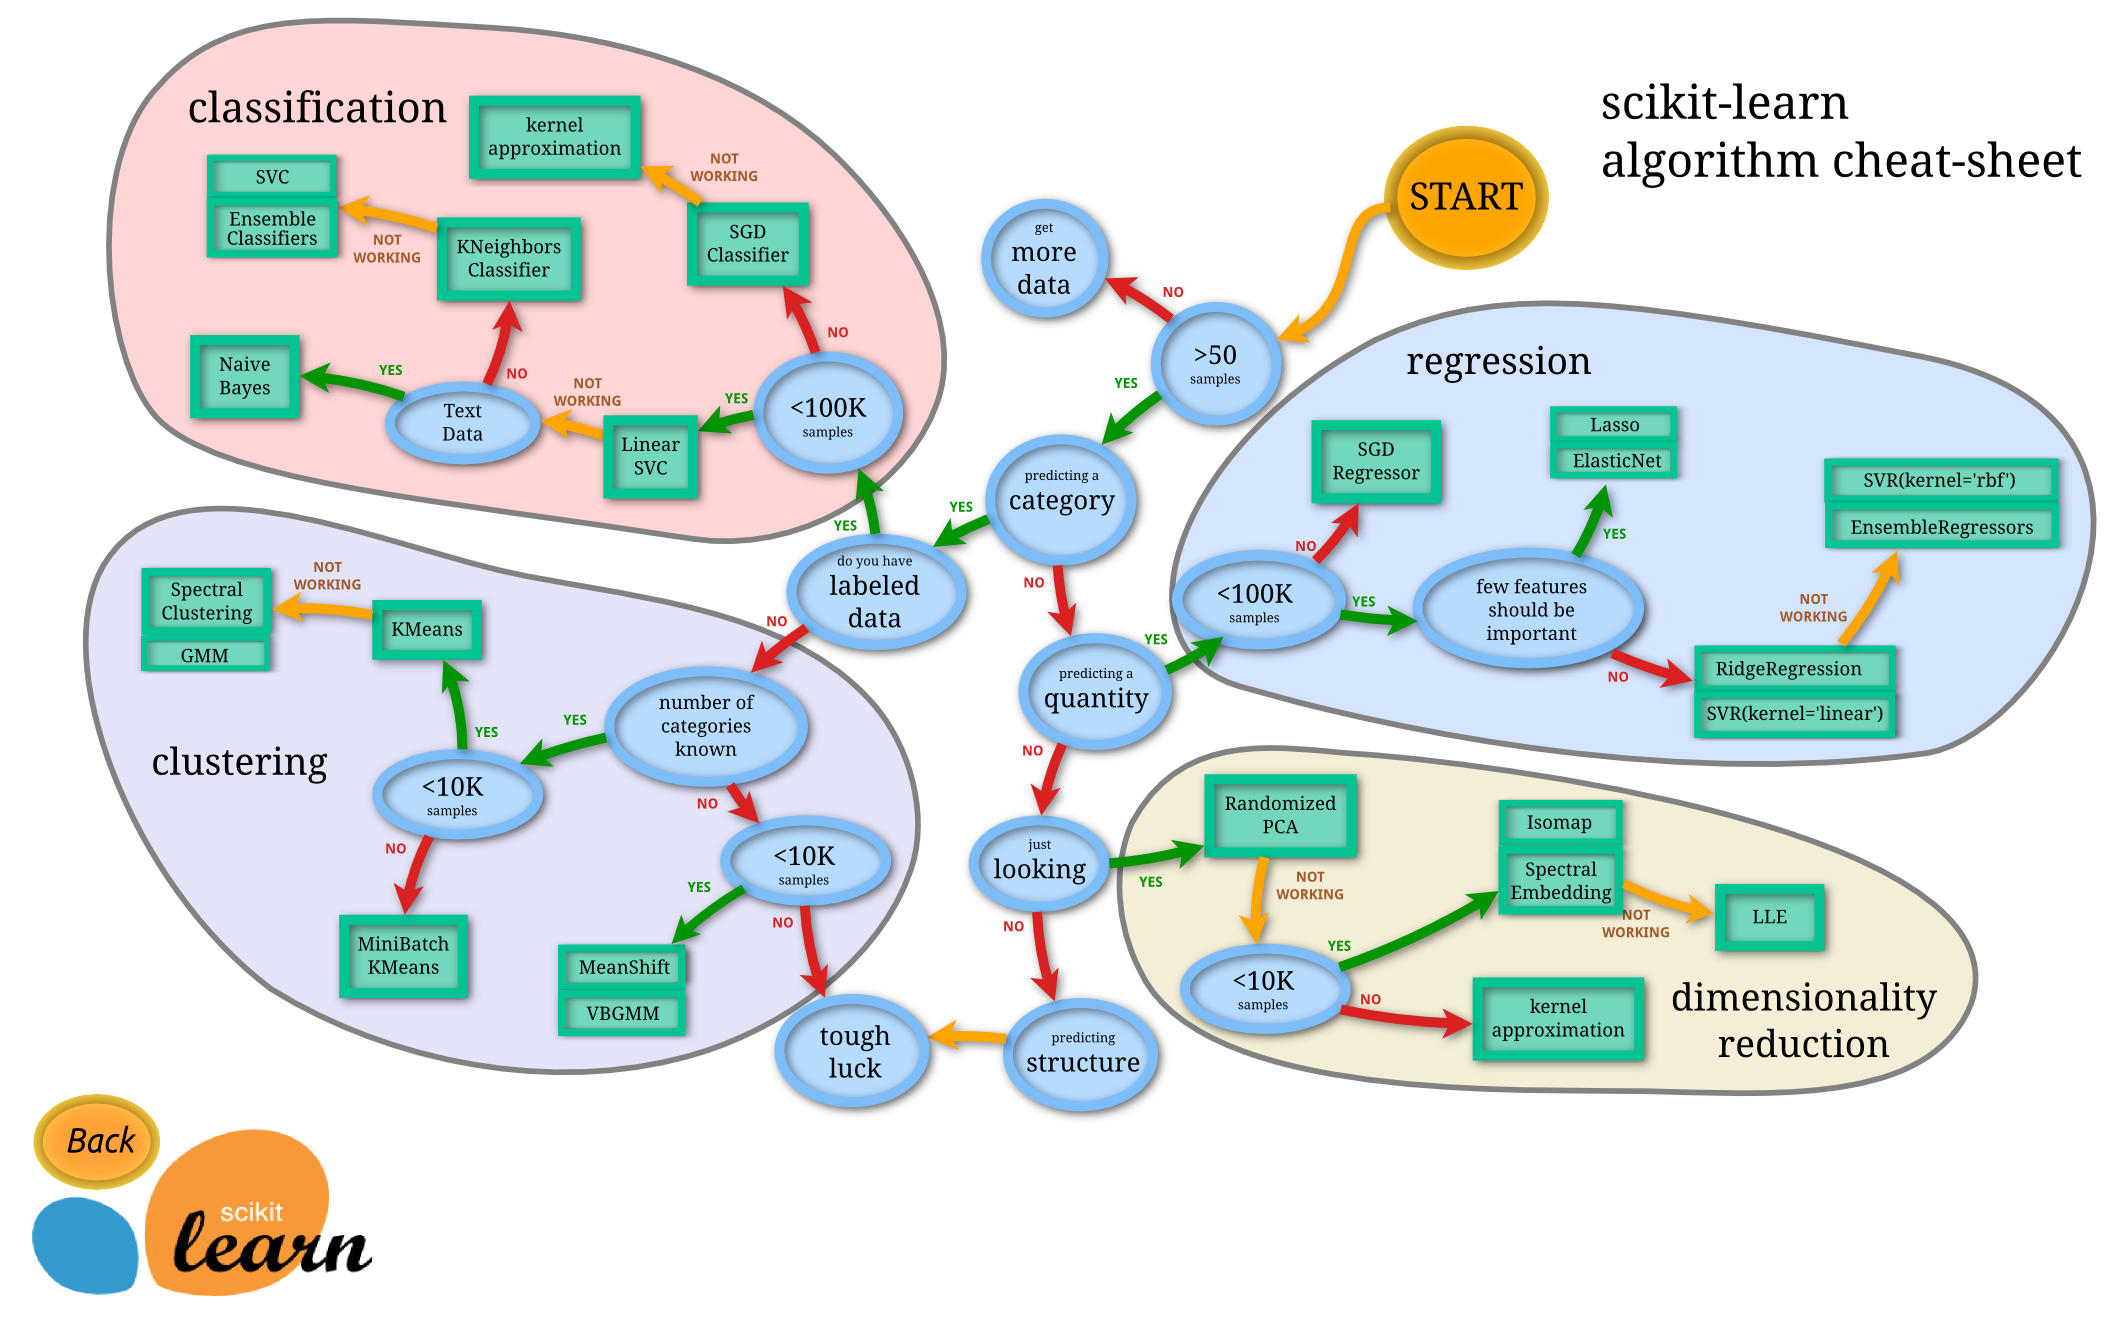
</div>

Based on this cheat sheet - I will research, understand and implement the following regression estimators:

* **Lasso**
* **ElasticNet**
* **RidgeRegression**
* **SVR (Suppor Vector Regressors)**
* **Ensemble Regressors**
* **SGD Regressor**

### 3.1 Train, Validation & Test Split <a class="anchor" id="TrainValidationTestSplit"></a>

Before I go all willy nilly with my modelling, I need to split the training data provided by Kaggle into **training** and **validation** sets. By default, Kaggle usually provides a **training** and **test** dataset. The winners are determined based on an evaluation metric on the **test** dataset. Therefore - it makes sense to split the provided **training** set into **training** and **validation** sets.

I will:

* **Train Set** - Train the models on this data set.
* **Validation Set** - Evaluate and tune the model according to the results from this data set.
* **Test Set** - Evaluate the final model using this data set.

This is time series data technically - so it may make sense to split on the date in chronological order, but I'm going to split at random for now.

**NOTE**: It's okay that I've preprocessed the data before splitting it because the methods & calculations I used do not cause any data leakage.

**NOTE**: Remember - I have two datasets - a one hot encoded dataset and a label encoded dataset. For my baseline models - I will just use the label encoded dataset. I'll save the one hot encoded dataset for the experimentation section.


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Split test data set into x and y using label encoded dataset
x = ordinal_df.drop('SalePrice',axis=1)
y = ordinal_df['SalePrice']

In [28]:
# Create training and validation sets based on random split
np.random.seed(10)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)

In [29]:
# Confirm the above
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1168, 80), (292, 80), (1168,), (292,))

Now that we've got our training and validation sets in order - LET'S MODEL.

[Back to Top](#BackToTop)

### 3.2 Stochastic Gradient Descent Regressor <a class="anchor" id="StochasticGradientDescentRegressor"></a>

Stochastic Gradient Descent Regressor (SGD Regressor) is just gradient descent, but taking 1 sample (or more if you wish) per step. This makes stochastic gradient descent great when there's tons of samples (or redundancy) and a lot of features/columns because it cuts down the number of calculations tremendously. (If you had a million rows - it would scale down the number of calculations by a scale of one million).

SGD is more of an optimization technique. It's a *way* to train a model. Therefore, `SGDClassifier(loss='log_loss')` results in logistic regression, equivalent to the LogisticRegression model/classifier. It's just fitted via SGD rather than one of the other solvers in `LogisticRegression`.

The sci-kit learn documentation recommends using the `SGDRegressor` for large sample sizes (which isn't my case).

With this being said - I'm still going to practice using `SGDRegressor` because I said I would.

In [30]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

**NOTE:** I'm using `StandardScaler` because the documentation recommends scaling our features before implementing `SGDRegressor`. I'm using `Pipeline` to do this because it's easy,simple and has a lot of advantages. However, I will demonstrate the `StandardScaler` in the cell below :)

In [31]:
# Demonstrate standardization
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
pd.set_option('display.max_columns', 80)
pd.DataFrame(scaled_x_train, columns=x_train.columns)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.175013,0.773290,1.557658,0.283972,-0.165559,0.058621,0.027989,0.700385,0.305256,-0.029273,0.595942,0.223739,1.132427,3.387440,-0.023979,1.275106,-1.584859,-0.088690,-0.518637,0.219362,-0.338129,-0.493524,-0.132929,0.758489,0.765325,0.553124,-0.572336,-0.699403,-0.252924,2.245274,-3.197658,-5.329031,-1.54030,-1.679998,-0.957202,-1.384124,-0.285084,-1.300679,-2.417928,-0.117887,-1.212598,0.248633,0.302627,0.387429,0.542320,-0.128577,0.719479,-0.822474,-0.236888,0.785447,-0.771329,1.366014,4.632660,-0.779792,0.915997,0.234885,-0.956223,-1.01863,-0.754478,0.234694,-0.820745,0.308343,0.294320,0.252492,0.260629,0.284178,-0.767568,-0.704226,-0.354835,-0.121796,-0.275822,-0.071083,-0.068479,-0.467882,-0.190791,-0.089334,-0.845478,1.639670,0.316150,0.206733
1,-0.918797,-0.868470,-0.042469,0.226687,0.154803,0.058621,0.027989,-0.979388,0.305256,-0.029273,0.595942,0.223739,-0.034100,-1.198512,-0.023979,-0.407746,-0.541683,-0.088690,1.284244,-0.442522,0.635935,1.888444,-0.132929,1.078314,1.052291,-1.355440,0.390462,-0.699403,-0.252924,-0.541633,-0.653472,-1.694398,-0.59541,-0.256023,0.300242,-0.275306,-0.285084,0.128339,0.343850,-0.117887,-1.212598,0.248633,-3.489955,0.124820,-0.796395,-0.128577,-0.575158,-0.822474,-0.236888,-1.034795,-0.771329,0.150855,-0.215859,-0.779792,-0.325889,0.234885,-0.956223,-1.01863,-0.754478,0.189677,-0.820745,-1.040514,-0.840777,0.252492,0.260629,0.284178,-0.767568,-0.704226,-0.354835,-0.121796,4.040305,-0.071083,-0.068479,-0.467882,-0.190791,-0.089334,-0.110991,0.887457,0.316150,0.206733
2,0.795405,0.069678,-0.042469,-1.663713,1.775909,0.058621,0.027989,-2.659160,0.305256,-0.029273,-0.647022,0.223739,0.465840,-0.052024,-0.023979,-0.407746,1.023080,0.640818,0.382804,0.748870,0.441123,-0.493524,-0.132929,-1.160461,-1.243438,0.553124,-0.572336,1.053608,-0.252924,0.851820,0.618620,0.122918,-0.59541,1.167952,0.321737,-0.275306,-0.285084,-0.443268,-0.206232,-0.117887,0.877903,0.248633,0.302627,-0.476888,1.200216,-0.128577,0.621486,-0.822474,-0.236888,0.785447,1.217440,0.150855,-0.215859,0.728150,0.295054,0.234885,0.588547,1.18565,0.287782,0.270708,1.421665,0.308343,-0.043395,0.252492,0.260629,0.284178,0.596194,0.750933,-0.354835,-0.121796,-0.275822,-0.071083,-0.068479,-0.467882,-0.190791,-0.089334,-1.947210,0.887457,0.316150,0.206733
3,-0.577389,0.304215,1.557658,-0.231592,-0.759198,0.058621,4.114404,0.700385,0.305256,-0.029273,-1.889986,0.223739,0.799134,-0.052024,-0.023979,-0.407746,1.023080,0.640818,2.185685,-1.865572,0.976858,-0.493524,-0.132929,0.438664,0.478359,0.553124,-0.572336,1.053608,-0.252924,0.851820,-0.653472,0.122918,-0.59541,0.693294,-0.314508,-0.275306,-0.285084,0.085241,-0.349436,-0.117887,0.877903,0.248633,0.302627,-0.637514,1.289617,-0.128577,0.576259,1.114319,-0.236888,-1.034795,1.217440,1.366014,-0.215859,2.236092,0.295054,-2.865061,0.588547,1.18565,-0.754478,0.092890,-0.820745,-1.040514,-1.464611,-1.151845,-1.148700,0.284178,-0.767568,-0.704226,-0.354835,-0.121796,-0.275822,-0.071083,-0.068479,-0.467882,-0.190791,-0.089334,-0.110991,0.887457,0.316150,0.206733
4,-0.465178,-0.868470,-0.042469,-1.663713,2.026014,0.058621,0.027989,-0.979388,0.305256,-0.029273,-1.

In [32]:
# Create pipeline
sgd_pipe = Pipeline([('scale', StandardScaler()),
                    ('sgdr', SGDRegressor(loss='squared_error', random_state=10))])

# Fit to training
sgd_pipe.fit(x_train,y_train)

# Score on validation
sgd_pipe.score(x_val,y_val) # default score method returns r-squared

0.8533271010126561

Based on the kaggle competition info - we want to evaluate our models on the **RMSLE** (root mean squared log error) not the **r-squared**. So before we continue, let me go ahead and import `mean_squared_log_error` and I can set `squared=False` to get the **RMSLE**. From now on I will use this function to do baseline evaluations rather than the `score` method.

In [33]:
from sklearn.metrics import mean_squared_log_error

In [34]:
# Create pipeline
sgd_pipe = Pipeline([('scale', StandardScaler()),
                    ('sgdr', SGDRegressor(loss='squared_error',random_state=10))])

# Fit to training
sgd_pipe.fit(x_train,y_train)

# Create predictions on validation
y_preds = sgd_pipe.predict(x_val)

# Evaluate predictions
mean_squared_log_error(y_val, y_preds, squared=False)

0.22946661358092

I will wait to cross-validate and elaborate on our evaluation metrics until the evaluation section. I will be focusing on the modelling side during this section. Next up - we have `Ridge`,`Lasso` and `ElasticNet`.


[Back to Top](#BackToTop)

### 3.3 Regularization <a class="anchor" id="Regularization"></a>

#### 3.3.1 Ridge Regressor <a class="anchor" id="RidgeRegressor"></a>
`Ridge` or L2 is one of the regularization techniques we have in regression. Essentially - regularization discourages learning a complex model the avoid the risk of overfitting. In other words - we are taking on some bias in order to have less variance.

In summary, when sample sizes are relatively small, then ridge regression can improve predictions by making the predictions less sensitive to the training data. Ridge regression does this by introducting the ridge regression penalty to the thing that must be minimized (sum of squared residuals in the case of linear regression).

I will leave it at that for now, but if you would like to understand `Ridge` in-depth, check out this StatQuest video which I found exremely helpful: https://www.youtube.com/watch?v=Q81RR3yKn30

In [35]:
from sklearn import linear_model
from sklearn.preprocessing import Normalizer

In [36]:
# Create pipeline
ridge_pipe = Pipeline([('scale', StandardScaler()),
                    ('norm', Normalizer()),
                    ('ridge', linear_model.Ridge(random_state=10))])

# Fit to training
ridge_pipe.fit(x_train,y_train)

# Create predictions
y_preds = ridge_pipe.predict(x_val)

# Evaluate
mean_squared_log_error(y_val,y_preds, squared=False)

0.1853753154926284

In our baseline models thus far, `Ridge` is outperforming `SGDRegressor`. However, you'll notice that in my pipeline I included `Normalizer` as well as `StandardScaler`. I'll explain why later and save it for the experimentation section. I admittedly started to experiment a bit early, but I will save the explanation for a later section.

Next up - `Lasso`!

[Back to Top](#BackToTop)

#### 3.3.2 Lasso Regressor <a class="anchor" id="LassoRegressor"></a>
`Lasso` Regression (L1) is very similar to ridge regression, but the ridge regression penalty squares the slope while the lasso regression takes the absolute value.
The biggest implication of this is that ridge can only shrink the slope asymptotically close to zero while lasso regression can shrink it all the way down to
zero. This makes lasso regression a little better than ridge regression at reducing the variance in models that contain a lot of useless variables.

In [37]:
# Create pipeline
las_pipe = Pipeline([('scale', StandardScaler()),
                    ('norm', Normalizer()),
                    ('las', linear_model.Lasso(random_state=10))])

# Fit to training
las_pipe.fit(x_train,y_train)

# Create predictions
y_preds = las_pipe.predict(x_val)

# Evaluate
mean_squared_log_error(y_val,y_preds, squared=False)

0.18725300237721404

The `Lasso` baseline model is performing nearly the same as the `Ridge` baseline.

[Back to Top](#BackToTop)

#### 3.3.3 Elastic-Net Regressor <a class="anchor" id="ElasticNetRegressor"></a>
`ElasticNet` regression combines lasso and ridge regression by summing the lasso regression and ridge regression penalties together with separate lambdas.
This way, you get the best of both worlds *and* you capture correlation between features.

`Elasticnet` would be great when we have a ton of features and we're not sure which features may or may not hold importance. If we know only a few features will be important, we would use `Lasso` regression. If all features are important, we would use `Ridge` regression.

When you compare this logic with the scikit-learn cheat-sheet - it makes perfect sense! Not that I never had faith in the cheat sheet,but now I have a solid understanding and intuition behind it.

In [38]:
# Create pipeline
en_pipe = Pipeline([('scale', StandardScaler()),
                    ('en', linear_model.ElasticNet(random_state=10))])

# Fit to training
en_pipe.fit(x_train,y_train)

# Create predictions
y_preds = en_pipe.predict(x_val)

# Evaluate
mean_squared_log_error(y_val,y_preds, squared=False)

0.1772410973087958

`ElasticNet` is outperforming `Lasso` and `Ridge`. You'll also notice I didn't have to normalize the data here. In fact - normalization *increased* the evaluation metric. Why? Heck if I know - but I suspect that elastic net performs better without normalization because the data holds correlation information better for the model.

[Back to Top](#BackToTop)

### 3.4 Support Vector Regressor <a class="anchor" id="SupportVectorRegressor"></a>

To understand how support vector machines work, I highly recommend the StatQuest series on YouTube. Here is the first video: https://www.youtube.com/watch?v=efR1C6CvhmE&t=4s

To understand the advantages of support vector machines, check out the sci-kit learn documentation here: https://scikit-learn.org/stable/modules/svm.html#

Once again, with SVM's, it's highly recommended to scale your features/data.

**NOTE:** I'm referring to the support vector regressor as SVR. SVR is just a class of support vector machines (SVM) similar to how the classification SVM would be referred to as support vector classifier or SVC.

In [39]:
from sklearn import svm

#### 3.4.1 Linear Kernel Function <a class="anchor" id="LinearKernelFunction"></a>

In [40]:
# Create pipeline
linear_svr_pipe = Pipeline([('scale', StandardScaler()),
                    ('en', svm.SVR(kernel='linear'))])

# Fit to training
linear_svr_pipe.fit(x_train,y_train)

# Create predictions
y_preds = linear_svr_pipe.predict(x_val)

# Evaluate
mean_squared_log_error(y_val,y_preds, squared=False)

0.3637295250106412

#### 3.4.2 RBF Kernel Function <a class="anchor" id="RBFKernelFunction"></a>

In [41]:
# Create pipeline
rbf_svr_pipe = Pipeline([('scale', StandardScaler()),
                    ('en', svm.SVR(kernel='rbf'))])

# Fit to training
rbf_svr_pipe.fit(x_train,y_train)

# Create predictions
y_preds = rbf_svr_pipe.predict(x_val)

# Evaluate
mean_squared_log_error(y_val,y_preds, squared=False)

0.4194793195211194

Neither of our kernel functions for `SVR` baseline models performed well. 

Before we finish up the modelling section - we have one more model - or family of models - to get to - `Ensemble Regressors`!

[Back to Top](#BackToTop)

### 3.5 Ensemble Methods <a class="anchor" id="EnsembleMethods"></a>

As per the sci-kit learn documentation states - the goal of **ensemble methods** is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

There are two families of **ensemble methods**:

1. **Averaging Methods**: The driving principle is to build several estimators indepedently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimators because its variance is reduced.

2. **Boosting Methods**: Base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

Based on this explanation - I will try one model from each of the two **ensemble method** families. I will test the `RandomForestRegressor` which is considered an **averaging method** and the `GradientBoostingRegressor` which is considered a **boosting method**.

#### 3.5.1 Random Forest Regressor <a class="anchor" id="RandomForestRegressor"></a>

Random forests are built out of decision trees, but don't have the same problem with accuracy that decision trees have by introducing randomness into the classifiers. 

As per the sci-kit learn documentation - a random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset (the boostrapped dataset) and uses averaging to improve the accuracy and control over-fitting.

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
# Instantiate Model
rf = RandomForestRegressor(random_state=10)

# Fit to training
rf.fit(x_train,y_train)

# Create predictions
y_preds = rf.predict(x_val)

# Evaluate
mean_squared_log_error(y_val,y_preds,squared=False)

0.14786338253188167

So far - our random forest regressor baseline model is outperforming all of our other baseline models. According to my research, sci-kit learn's ensemble methods typically perform very well - although more compute costly than other estimators.

[Back to Top](#BackToTop)

#### 3.5.2 Gradient Boosting Regressor <a class="anchor" id="GradientBoostingRegressor"></a>

To learn more about `AdaBoost` and `Gradient Tree Boosting` read the sci-kit learn documentation here: https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting.

Basically - `AdaBoost` combines a lot of weak learners (small decision trees or stumps), giving some trees more weight than others, while each learner is made by taking the previous learners mistakes into account. How well the new learner took the previous learn's errors into account will determine its weight. Sci-kit learn does a good job of visualizing this with the following chart:


<div>
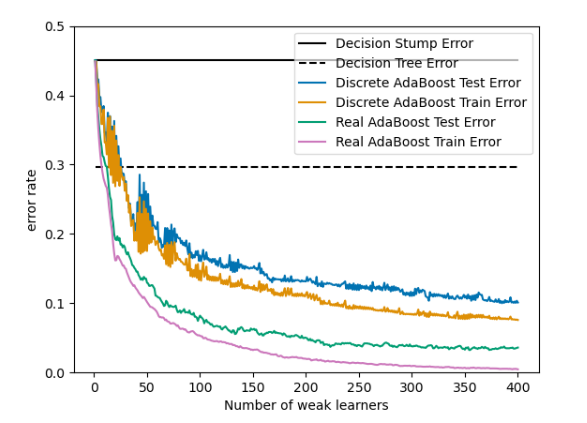
</div>

`Gradient Boost` is similar to `AdaBoost`, however the tree sizes are usually larger. In addition, all the trees are scaled by the same amount. So it differs from `AdaBoost` because weights do not differ. 

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
# Instantiate Model
gb = GradientBoostingRegressor(random_state=10)

# Fit to training
gb.fit(x_train,y_train)

# Create predictions
y_preds = gb.predict(x_val)

# Evaluate
mean_squared_log_error(y_val,y_preds,squared=False)

0.13532381323982617

Out of all my baseline models -  `GradientBoostingRegressor` is evaluating the best. Or - in other words - it has the lowest `RMSLE` of all the baseline model's I've created.

But what's a good `RMSLE`? What are we aiming for? How do we know whether we've done a good job at predicting the housing price or not?

These questions and more will be answered in the next section - **Evaluation** :)

[Back to Top](#BackToTop)

### 4. Evaluation <a class="anchor" id="Evaluation"></a>

In a real-world project - it would make sense to evaluate a model on a variety of evaluation metrics in order to get a complete picture of how our model is performing. For this project - I'm only focusing on the `RMSLE` because that is what submissions and scores are based on.

`RMSLE` is the same as `RMSE` or `RMSD`, but we are taking the logarithm of the predicted value and the observed value so that expensive and cheap houses affect the result equally.

But what `RMSLE` should we aim for? 

To have a goal in mind - I'm going to download the leaderboard data from the competition so I can have an idea of how other people are performing.

In [46]:
# Load leaderboard data
leaderboard_df = pd.read_csv('Datasets/house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques-publicleaderboard.csv')

In [47]:
# Sample the data
leaderboard_df.head()

,TeamId,TeamName,SubmissionDate,Score
0,6068702,fedesoriano,2022-09-24 13:57:14,0.00000
1,8558182,"💥Tesla, Inc.💥",2022-09-04 01:02:57,0.00044
2,7110709,YIYANG HAO,2022-09-26 04:00:40,0.00044
3,8821167,Moshi Wei,2022-09-06 16:29:27,0.00044
4,8985722,satya prakash shukl,2022-10-25 14:54:33,0.00044


In [48]:
# More info
leaderboard_df.Score.describe()

count    4026.000000
mean        0.336232
std         1.149442
min         0.000000
25%         0.131983
50%         0.149990
75%         0.207890
max        28.630140
Name: Score, dtype: float64

Based on the information in these tables above - we can see that the median score is 0.1499 and there's over 4,000 submissions. However - let's look into this a bit further with some visualization.

In [49]:
import matplotlib.pyplot as plt

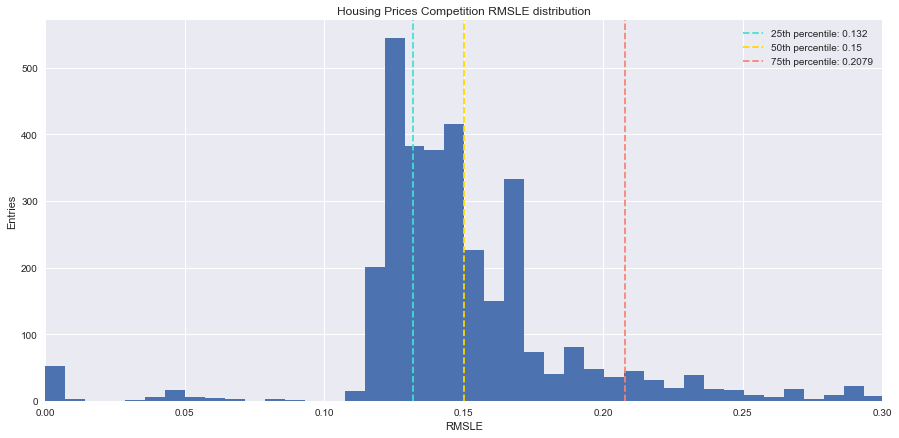

In [50]:
# Change style
plt.style.use('seaborn')

# Create the plot
fig, ax = plt.subplots(figsize=(15,7))

# Plot the data
ax.hist(leaderboard_df['Score'], bins=4000)

# Zoom into where most of the scores are distributed
plt.xlim(0,.3)

# Capture 25th percentile value
lp = round(leaderboard_df.Score.describe()['25%'],4)

# Capture median value
mv = round(leaderboard_df.Score.describe()['50%'],4)

# Capture 75th percentile value
hp = round(leaderboard_df.Score.describe()['75%'],4)

# Plot our lines
ax.axvline(lp, linestyle = '--', color = 'turqUoise')
ax.axvline(mv, linestyle = '--', color = 'GOLD')
ax.axvline(hp, linestyle = '--', color = 'salmon')

# Some formatting
ax.set(title='Housing Prices Competition RMSLE distribution',
      ylabel='Entries',
      xlabel='RMSLE');

# Add legend
plt.legend({f'25th percentile: {lp}':lp,
            f'50th percentile: {mv}':mv,
            f'75th percentile: {hp}': hp})

# Display the chart
plt.show();

Based on this visual, it looks like the majority of entries lie between 0.132 RMSLE and 0.2079 **RMSLE**. 

**Therefore - I will aim to beat a RMSLE of 0.132.**

So far - we're already pretty close! The **RMSLE** of my baseline `GradientBoostingRegressor` estimator has a value of 0.135. Let's go ahead and tune this baseline model and see what improvements we can make.

[Back to Top](#BackToTop)

### 5. Tuning <a class="anchor" id="Tuning"></a>

Because our baseline `GradientBoostingRegressor` performed so well relative to our other models/estimators - I'm only going to tune this one model. However, I'm going to really tune the heck out of by using `GridSearchCV`.

To understand what `GradientBoostingRegressor` parameters should be tuned and why - check out this amazing article: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

**NOTE:** I am taking this tuning very seriously - with over 86,400 fits this will likely take many hours. 

In [ ]:
%%time 

# Parameters to tune
param_grid = {'learning_rate': [0.25, 0.1, 0.05, 0.01, 0.001],
              'n_estimators': [5,20,100,150,200,400],
              'max_depth': [3,6,9,15],
              'min_samples_split': [0.1,0.2,0.4,0.8,1,2],
              'min_samples_leaf': [0.1,0.2,0.4,0.8,1,2],
              'max_features': ['auto', 'sqrt', 'log2', None]}

# Create a make_scorer object that will use RMSLE as our evaluation metric in the grid search
rmsle_scorer = make_scorer(mean_squared_log_error, 
                           squared=False,
                          greater_is_better=False) # We want to MINIMIZE the RMSLE

# Set up instance of GridSearchCV with 5 fold cross-validation
gs_gb = GridSearchCV(GradientBoostingRegressor(random_state=10),
                    param_grid=param_grid,
                    scoring=rmsle_scorer,
                    cv=5,
                    verbose=3)

# Fit to our training data
gs_gb.fit(x_train,y_train)

Excellent! 4 and a half hours of tuning later - let's see what `GridSearchCV` deemed as our highest performing parameters.

**NOTE:** I had to restart my notebook so you won't see the output of these cells. However - I was able to capture the tuned hyperparameters which you'll see below.

In [ ]:
# Check the best score first
gs_gb.best_score_ # Returned -0.12532677946263493

Looks like we lowered our `RMSLE` to .125. 

**NOTE:** This is negative because `GridSearchCV` is attempting to maximize an evaluation metric. All they did was flip the sign.

In [ ]:
 # Check the best parameters
gs_gb.best_params_

The code above returned a dictionary of the best performing parameters. Those parameters were: 

{'learning_rate': 0.05,

 'max_depth': 6,
 
 'max_features': 'log2',
 
 'min_samples_leaf': 2,
 
 'min_samples_split': 0.1,
 
 'n_estimators': 400}

In [52]:
# Create our 'best model' with the best performing hyperparameters
best_model = GradientBoostingRegressor(random_state=10,
                                      learning_rate=0.05,
                                      max_depth=6,
                                      max_features='log2',
                                      min_samples_leaf=2,
                                      min_samples_split=0.1,
                                      n_estimators=400)

I can even visualize all of the different `RMSLE` results and their distribution..

**NOTE:** I had to restart my notebook and didn't export these results. So - you won't see a visualization below :( BUT if you want to plot `GridSearchCV` results, this code does the job.

In [ ]:
# Load all results into a dataframe and plot a histogram 
gscv_results = pd.DataFrame(gs_gb.cv_results_)
gscv_results.mean_test_score.plot(kind='hist', bins=100);

Let's evaluate the best estimator on our validation set.

In [53]:
# Fit the model
best_model.fit(x_train,y_train)

# Create predictions
y_preds = best_model.predict(x_val)

# Evaluate
mean_squared_log_error(y_val,y_preds,squared=False)

0.1314661618206101

Now that we've tuned I've tuned the model and increased it's performance a bit - let's do some experimenting to see if we can squeeze out some additional performance before we evaluate it on the **test** data set that Kaggle has provided.

[Back to Top](#BackToTop)

### 6. Further Experimentation <a class="anchor" id="FurtherExperimentation"></a>

In this section, I'm just playing around to see how I can improve our model. Some concepts I touch are:

* **Feature Selection**
* **Feature Scaling**
* **One Hot Encoding**
* **Cross-Validation**

I believe I've already touched on these concepts earlier on in the workbook, so I won't be adding any explanations. The code should be easy to follow at this point.

In [54]:
# Create pipeline
pipe = Pipeline([('scale', StandardScaler()),
                    ('model', best_model)])

# Fit to training
pipe.fit(x_train,y_train)

# Create predictions
y_preds = pipe.predict(x_val)

# Evaluate
mean_squared_log_error(y_val,y_preds, squared=False)

0.13139923701929906

In [55]:
# Create pipeline
pipe = Pipeline([('norm', Normalizer()),
                    ('model', best_model)])

# Fit to training
pipe.fit(x_train,y_train)

# Create predictions
y_preds = pipe.predict(x_val)

# Evaluate
mean_squared_log_error(y_val,y_preds, squared=False)

0.15257926902457128

Scaling our data seemed to increase performance slightly.

Up next I'm going to see how dropping noisy features/columns changes model performance. I'll start with our unique identifier column `Id`.

In [56]:
# Create pipeline
pipe = Pipeline([('scale', StandardScaler()),
                    ('model', best_model)])

# Fit to training
pipe.fit(x_train.drop('Id',axis=1),y_train)

# Create predictions
y_preds = pipe.predict(x_val.drop('Id',axis=1))

# Evaluate
mean_squared_log_error(y_val,y_preds, squared=False)

0.12932205735063365

As expected - the model performs better without the `Id` column.

What other features might make sense to drop? Well - I could take a look at the data dictionary and try to decide myself based on their definitions. In a real-world scenario - I could work with a subject matter expert.

In this case - I'm going to take a look at the correlation matrix from the Pandas Profile Report (link above) and drop features with a correlation of near zero (when correlating with our label - Sales Price)

In [57]:
# Columns to drop
drop_columns = ['Id', 'MSSubClass']

# Create pipeline
pipe = Pipeline([('scale', StandardScaler()),
                    ('model', best_model)])

# Fit to training
pipe.fit(x_train.drop(drop_columns,axis=1),y_train)

# Create predictions
y_preds = pipe.predict(x_val.drop(drop_columns,axis=1))

# Evaluate
mean_squared_log_error(y_val,y_preds, squared=False)

0.1288008619810098

Look at that - my theory seems to be working so far. Let's keep going.

In [58]:
# Columns to drop
drop_columns = ['Id', 'BsmtHalfBath']

# Create pipeline
pipe = Pipeline([('scale', StandardScaler()),
                    ('model', best_model)])

# Fit to training
pipe.fit(x_train.drop(drop_columns,axis=1),y_train)

# Create predictions
y_preds = pipe.predict(x_val.drop(drop_columns,axis=1))

# Evaluate
mean_squared_log_error(y_val,y_preds, squared=False)

0.12523770555841798

In [59]:
# Columns to drop
drop_columns = ['Id', 'MSSubClass','BsmtHalfBath']

# Create pipeline
pipe = Pipeline([('scale', StandardScaler()),
                    ('model', best_model)])

# Fit to training
pipe.fit(x_train.drop(drop_columns,axis=1),y_train)

# Create predictions
y_preds = pipe.predict(x_val.drop(drop_columns,axis=1))

# Evaluate
mean_squared_log_error(y_val,y_preds, squared=False)

0.1300237969272167

The results above are interesting - removing the columns individually yeilded improvements, yet removing all of them didn't. I'll go ahead and stop here.

**NOTE:** What I'm doing here is referred to as **feature selection**. To have a better idea on what features to model, check out this amazing article: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

If you recall from earlier - during the beginning of this project I created an ordinal dataframe *and* a one hot encoded dataframe. Let's view those again.

In [60]:
pd.set_option('display.max_columns', 230)
one_hot_df.head()

,one_hot__MSZoning_C (all),one_hot__MSZoning_FV,one_hot__MSZoning_RH,one_hot__MSZoning_RL,one_hot__MSZoning_RM,one_hot__Street_Grvl,one_hot__Street_Pave,one_hot__Alley_Grvl,one_hot__Alley_NA,one_hot__Alley_Pave,one_hot__LandContour_Bnk,one_hot__LandContour_HLS,one_hot__LandContour_Low,one_hot__LandContour_Lvl,one_hot__Utilities_AllPub,one_hot__Utilities_NoSeWa,one_hot__LotConfig_Corner,one_hot__LotConfig_CulDSac,one_hot__LotConfig_FR2,one_hot__LotConfig_FR3,one_hot__LotConfig_Inside,one_hot__Neighborhood_Blmngtn,one_hot__Neighborhood_Blueste,one_hot__Neighborhood_BrDale,one_hot__Neighborhood_BrkSide,one_hot__Neighborhood_ClearCr,one_hot__Neighborhood_CollgCr,one_hot__Neighborhood_Crawfor,one_hot__Neighborhood_Edwards,one_hot__Neighborhood_Gilbert,one_hot__Neighborhood_IDOTRR,one_hot__Neighborhood_MeadowV,one_hot__Neighborhood_Mitchel,one_hot__Neighborhood_NAmes,one_hot__Neighborhood_NPkVill,one_hot__Neighborhood_NWAmes,one_hot__Neighborhood_NoRidge,one_hot__Neighborhood_NridgHt,one_hot__Neighborhood_OldTown,one_hot__Neighborhood_SWISU,one_hot__Neighborhood_Sawyer,one_hot__Neighborhood_SawyerW,one_hot__Neighborhood_Somerst,one_hot__Neighborhood_StoneBr,one_hot__Neighborhood_Timber,one_hot__Neighborhood_Veenker,one_hot__Condition1_Artery,one_hot__Condition1_Feedr,one_hot__Condition1_Norm,one_hot__Condition1_PosA,one_hot__Condition1_PosN,one_hot__Condition1_RRAe,one_hot__Condition1_RRAn,one_hot__Condition1_RRNe,one_hot__Condition1_RRNn,one_hot__Condition2_Artery,one_hot__Condition2_Feedr,one_hot__Condition2_Norm,one_hot__Condition2_PosA,one_hot__Condition2_PosN,one_hot__Condition2_RRAe,one_hot__Condition2_RRAn,one_hot__Condition2_RRNn,one_hot__BldgType_1Fam,one_hot__BldgType_2fmCon,one_hot__BldgType_Duplex,one_hot__BldgType_Twnhs,one_hot__BldgType_TwnhsE,one_hot__HouseStyle_1.5Fin,one_hot__HouseStyle_1.5Unf,one_hot__HouseStyle_1Story,one_hot__HouseStyle_2.5Fin,one_hot__HouseStyle_2.5Unf,one_hot__HouseStyle_2Story,one_hot__HouseStyle_SFoyer,one_hot__HouseStyle_SLvl,one_hot__RoofStyle_Flat,one_hot__RoofStyle_Gable,one_hot__RoofStyle_Gambrel,one_hot__RoofStyle_Hip,one_hot__RoofStyle_Mansard,one_hot__RoofStyle_Shed,one_hot__RoofMatl_ClyTile,one_hot__RoofMatl_CompShg,one_hot__RoofMatl_Membran,one_hot__RoofMatl_Metal,one_hot__RoofMatl_Roll,one_hot__RoofMatl_Tar&Grv,one_hot__RoofMatl_WdShake,one_hot__RoofMatl_WdShngl,one_hot__Exterior1st_AsbShng,one_hot__Exterior1st_AsphShn,one_hot__Exterior1st_BrkComm,one_hot__Exterior1st_BrkFace,one_hot__Exterior1st_CBlock,one_hot__Exterior1st_CemntBd,one_hot__Exterior1st_HdBoard,one_hot__Exterior1st_ImStucc,one_hot__Exterior1st_MetalSd,one_hot__Exterior1st_Plywood,one_hot__Exterior1st_Stone,one_hot__Exterior1st_Stucco,one_hot__Exterior1st_VinylSd,one_hot__Exterior1st_Wd Sdng,one_hot__Exterior1st_WdShing,one_hot__Exterior2nd_AsbShng,one_hot__Exterior2nd_AsphShn,one_hot__Exterior2nd_Brk Cmn,one_hot__Exterior2nd_BrkFace,one_hot__Exterior2nd_CBlock,one_hot__Exterior2nd_CmentBd,one_hot__Exterior2nd_HdBoard,one_hot__Exterior2nd_ImStucc,one_hot__Exterior2nd_MetalSd,one_hot__Exterior2nd_Other,one_hot__Exterior2nd_Plywood,one_hot__Exterior2nd_Stone,one_hot__Exterior2nd_Stucco,one_hot__Exterior2nd_VinylSd,one_hot__Exterior2nd_Wd Sdng,one_hot__Exterior2nd_Wd Shng,one_hot__MasVnrType_BrkCmn,one_hot__MasVnrType_BrkFace,one_hot__MasVnrType_NA,one_hot__MasVnrType_None,one_hot__MasVnrType_Stone,one_hot__Foundation_BrkTil,one_hot__Foundation_CBlock,one_hot__Foundation_PConc,one_hot__Foundation_Slab,one_hot__Foundation_Stone,one_hot__Foundation_Wood,one_hot__Heating_Floor,one_hot__Heating_GasA,one_hot__Heating_GasW,one_hot__Heating_Grav,one_hot__Heating_OthW,one_hot__Heating_Wall,one_hot__CentralAir_N,one_hot__CentralAir_Y,one_hot__Electrical_FuseA,one_hot__Electrical_FuseF,one_hot__Electrical_FuseP,one_hot__Electrical_Mix,one_hot__Electrical_NA,one_hot__Electrical_SBrkr,one_hot__GarageType_2Types,one_hot__GarageType_Attchd,one_hot__GarageType_Basment,one_hot__GarageType_BuiltIn,one_hot__GarageType_CarPort,one_hot__Ga

In [61]:
ordinal_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,2,2,4,4,1,5,3,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,196.0,3,3,3,4,4,2,7,706,2,0,150,856,2,5,2,6,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,1,2,2003.0,3,2,548,4,4,3,0,61,0,0,0,0,1,1,2,0,2,2008,9,5,208500
1,2,20,4,80.0,9600,2,2,4,4,1,3,3,25,2,3,1,3,6,8,1976,1976,2,2,9,9,4,0.0,2,3,2,4,4,5,6,978,2,0,284,1262,2,5,2,6,1262,0,0,1262,0,1,2,0,3,1,2,6,7,1,4,2,1976.0,3,2,460,4,4,3,298,0,0,0,0,0,1,1,2,0,5,2007,9,5,181500
2,3,60,4,68.0,11250,2,2,3,4,1,5,3,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,162.0,3,3,3,4,4,3,7,486,2,0,434,920,2,5,2,6,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,4,2,2001.0,3,2,608,4,4,3,0,42,0,0,0,0,1,1,2,0,9,2008,9,5,223500
3,4,70,4,60.0,9550,2,2,3,4,1,1,3,7,3,3,1,6,7,5,1915,1970,2,2,14,16,4,0.0,2,3,1,3,5,2,6,216,2,0,540,756,2,4,2,6,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,5,6,1998.0,2,3,642,4,4,3,0,35,272,0,0,0,1,1,2,0,2,2006,9,1,140000
4,5,60,4,84.0,14260,2,2,3,4,1,3,3,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,350.0,3,3,3,4,4,4,7,655,2,0,490,1145,2,5,2,6,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,4,2,2000.0,3,3,836,4,4,3,192,84,0,0,0,0,1,1,2,0,12,2008,9,5,250000


In all of my baseline models, I used the ordinal dataframe. Let's test and see how the one hot encoded dataframe performs with our best model.

In [62]:
# Split test data set into x and y using one hot encoded dataset
x = one_hot_df.drop('remainder__SalePrice',axis=1)
y = one_hot_df['remainder__SalePrice']

# Create training and validation sets based on random split
np.random.seed(10)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)

# Create pipeline
pipe = Pipeline([('scale', StandardScaler()),
                    ('model', best_model)])

# Fit to training
pipe.fit(x_train,y_train)

# Create predictions
y_preds = pipe.predict(x_val)

# Evaluate
mean_squared_log_error(y_val,y_preds, squared=False)

0.12585138610096444

**NOTE:** I've made a fatal error in my evaluations - I'm not doing any cross-validation. Therefore, some of these `RMSLE` improvements may just be due to a lucky split. To prevent this error from happening in future projects, it would make sense to instantiate an end-to-end `Pipeline` that checks all of our boxes.



To give you an example, look at the `RMSLE` for our latest estimator/model when I change the random seed.

In [154]:
# Split test data set into x and y using one hot encoded dataset
x = one_hot_df.drop('remainder__SalePrice',axis=1)
y = one_hot_df['remainder__SalePrice']

# Create training and validation sets based on random split
np.random.seed(69)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)

# Create pipeline
pipe = Pipeline([('scale', StandardScaler()),
                ('model', GradientBoostingRegressor(random_state=10,
                                                     learning_rate=0.05,
                                                     max_depth=6,
                                                     max_features='log2',
                                                     min_samples_leaf=2,
                                                     min_samples_split=0.1,
                                                     n_estimators= 400))])

# Fit to training
pipe.fit(x_train,y_train)

# Create predictions
y_preds = pipe.predict(x_val)

# Evaluate
mean_squared_log_error(y_val,y_preds, squared=False)

0.10797658742463397

It appears our model is performing better, but really we've just got a luckier split in our data. Realistically I should have been cross validating during all of my evaluations, but that's okay - I'm still happy with my progress so far! 

Interestingly enough, following this same logic - contestants in the Kaggle competition could theoretically loop through random seeds and choose the one that yields the lowest `RMSLE`. I'm willing to bet that the majority of high performers on the leaderboard have done this.

Let's move forward with the latest model and evaluate it on the test data set.

[Back to Top](#BackToTop)

### 7. Final Model Submission <a class="anchor" id="FinalModelSubmission"></a>

In this section - I'm going to implement all of the steps I implemented in previous sections on the **test** dataset Kaggle provides. If you recall from earlier - we've yet to actually test our model on the true **test** dataset. I split the provided **training** dataset into **training** and **validation** sets. Well, it's finally time to use the **test** dataset!

In this section I will implement our sci-kit learn tools in a much cleaner, streamlined fashion with an end-to-end `Pipeline`. Essentially - I'll be creating a `Pipeline` that does all of the preprocessing for us. Here's what we need to include in that pipeline:

1. Imputation
2. Encoding
3. Scaling

Let's load the official test data set from Kaggle.

In [159]:
# Load the test dataset
test_df = pd.read_csv('Datasets/house-prices-advanced-regression-techniques/test.csv', na_values='NA') 

# Drop our ID column
x_test = test_df.drop(['Id'], axis=1)

# Confirm
x_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GL

Let's map out our features once again so we can preprocess them differently. This is because our data is **heterogeneous** meaning it has a mixture of different kinds of features.

In [171]:
# Ordinal values and their desired category order
ordinal_features = {'LotShape': ['Reg', 'IR1', 'IR2', 'IR3','NA'],
                  'Utilities': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO', 'NA'],
                  'LandSlope': ['Gtl', 'Mod', 'Sev','NA'],
                  'ExterQual': ['Ex', 'Gd', 'TA', 'Fa','NA'],
                  'ExterCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po','NA'],
                  'BsmtQual': ['Ex', 'Gd', 'TA', 'Fa','NA'],
                 'BsmtCond': ['Gd', 'TA', 'Fa', 'Po', 'NA'],
                  'BsmtExposure': ['Gd', 'Av', 'Mn', 'No', 'NA'],
                  'BsmtFinType1': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
                  'BsmtFinType2': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
                  'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po','NA'],
                  'KitchenQual': ['Ex', 'Gd', 'TA', 'Fa', 'NA'],
                  'Functional': ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'NA'],
                  'FireplaceQu': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
                  'GarageFinish': ['Fin', 'RFn', 'Unf', 'NA'],
                  'GarageQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
                  'GarageCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
                  'PavedDrive': ['Y', 'P', 'N','NA'],
                  'PoolQC': ['Ex', 'Gd', 'Fa', 'NA'],
                  'Fence': ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA']}

# Nominal values
nominal_features = []
for label,content in x_test.items():
    if not pd.api.types.is_numeric_dtype(content) and label not in ordinal_features:
        nominal_features.append(label)
        
# Numerical values
numerical_features = []
for label,content in x_test.items():
    if pd.api.types.is_numeric_dtype(content):
        numerical_features.append(label)

Earlier - I imputed and transformed my columns by hand. This time I'm throwing them into a `Pipeline` using `ColumnTransformer` and `SimpleImputer`.

In [172]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [173]:
# Create pipeline for ordinal values
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('encoder', OrdinalEncoder(categories=[category[::-1] for category in list(ordinal_features.values())])) # List comprehension
])

# Create pipeline for nominal values
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

# Create pipeline for numerical values
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

In [174]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[('ordinal', ordinal_transformer, list(ordinal_features.keys())),
                  ('nominal', nominal_transformer, nominal_features),
                  ('numerical', numerical_transformer, numerical_features)])

# Create regression pipeline
reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gradient_boost', GradientBoostingRegressor(
        random_state=10,
        learning_rate=0.05,
        max_depth=6,
        max_features='log2',
        min_samples_leaf=2,
        min_samples_split=0.1,
        n_estimators= 400))
])

In [175]:
# Reload the train dataset
train_df = pd.read_csv('Datasets/house-prices-advanced-regression-techniques/train.csv', na_values='NA') 

# Drop our ID column
train_df.drop(['Id'], axis=1, inplace=True)

# Separate features and labels
x = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [176]:
# Fit our model on training
reg.fit(x,y)

# Create our predictions on the test
y_preds = reg.predict(x_test)

In [177]:
y_preds

array([120265.59044315, 146584.94073722, 190743.47600578, ...,
       181052.38218731, 116375.72356384, 209018.81919264])

In [178]:
# Quick confirmation
y_preds.size, test_df.shape

(1459, (1459, 80))

Now that I've got my predictions to submit, I've just got to get them into the correct format required by Kaggle and export the results!

In [179]:
df_preds = pd.DataFrame()
df_preds['Id'] = test_df['Id']
df_preds['SalePrice'] = y_preds

In [180]:
df_preds

,Id,SalePrice
0,1461,120265.590443
1,1462,146584.940737
2,1463,190743.476006
3,1464,200123.884220
4,1465,201604.315602
...,...,...
1454,2915,77341.743895
1455,2916,77344.408992
1456,2917,181052.382187
1457,2918,116375.723564


Excellent - I've gotten the data into a format that Kaggle requires. *However* - it looks like Kaggle allows 10 submissions a day. So, before I export the data - I'm going to loop through 10 random seeds and see how different the model performs across random seeds.

In a real-world production scenario - we would hope that changing the random seed doesn't change performance significantly. But - if we just need to make predictions *once* like in the case of this Kaggle competition, might as well try to use luck to our advantage.

In [189]:
nums = np.arange(0,10,1)
for num in nums:
    # Pipeline
    reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gradient_boost', GradientBoostingRegressor(
        random_state=num, # Here's where I'm implementing the seed
        learning_rate=0.05,
        max_depth=6,
        max_features='log2',
        min_samples_leaf=2,
        min_samples_split=0.1,
        n_estimators= 400))
])
    # Fit our model on training
    reg.fit(x,y)

    # Create our predictions on the test
    y_preds = reg.predict(x_test)
    
    # Create our results dataframe
    df_preds = pd.DataFrame()
    df_preds['Id'] = test_df['Id']
    df_preds['SalePrice'] = y_preds
    
    # Export the dataframe as csv with seed appended
    df_preds.to_csv(f'Datasets/house-prices-advanced-regression-techniques/kaggle exports/results{num}.csv', index=False)

AND the results are..


<div>
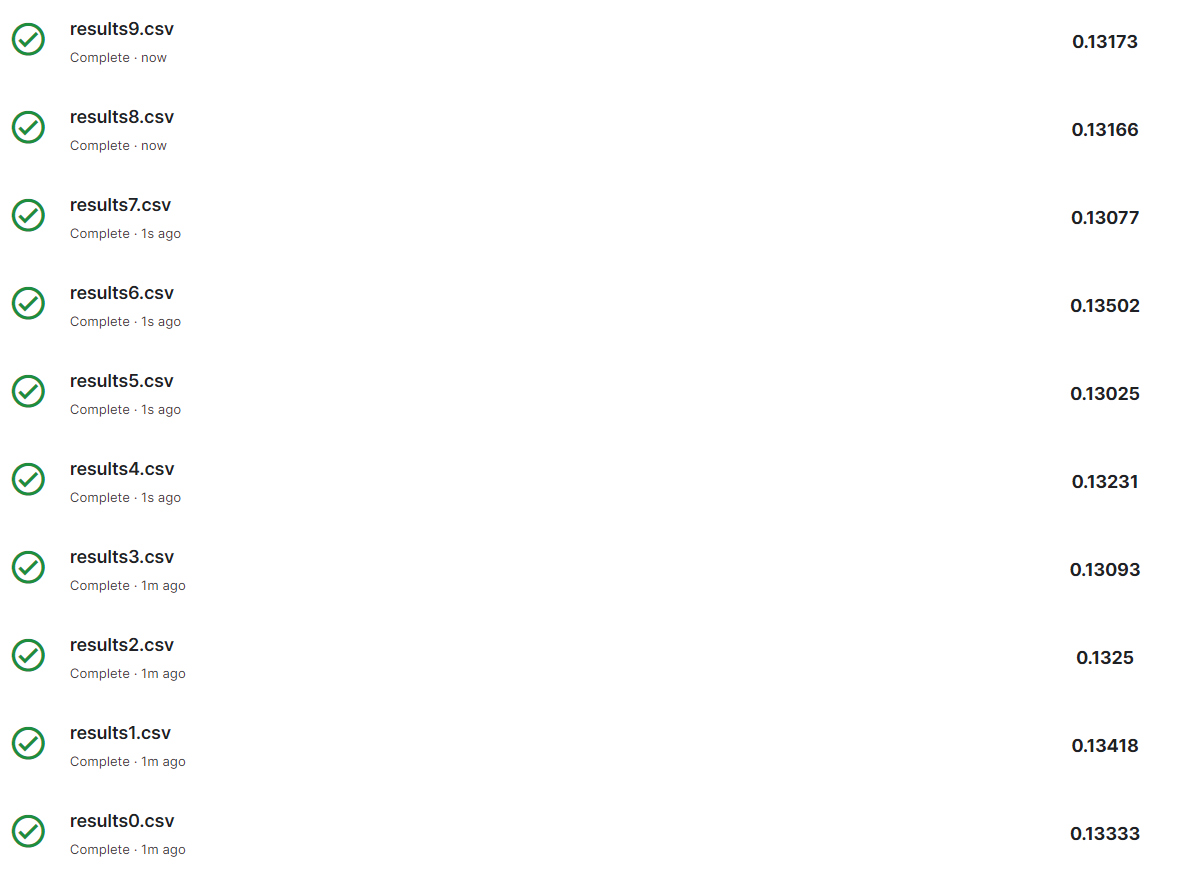
</div>

We're not seeing much variation across our random seeds - which really is a good thing. We can trust this model to make consistent predictions.

Let's take our lowest `RMSLE` score and see what percentile I placed in.

In [201]:
# My lowest score
lowest_score = 0.13025

# Calculate percentile
len(leaderboard_df[leaderboard_df['Score'] < lowest_score]) / len(leaderboard_df) * 100

22.851465474416294

I've placed in the 22-23rd percentile! And if you remember from the Evaluation section of this notebook - I stated that I wanted to beat the 25th percentile. Well, looks like I did just that!

[Back to Top](#BackToTop)